### Author: Folajimi Olaniyan

## Introduction

In this work, we will like to study the evolution of French first names across the departments of France. In particular, we focus on the _INSEE Given Name Data set_ and then use R to analyse and answer questions about the dataset. 

In [ ]:
library(ggplot2)
library(tidyverse)
library(dplyr)

### Download Raw Data from the website

In [2]:
file = "dpt2020_txt.zip"
if(!file.exists(file)){
  download.file("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip", destfile=file)
}
unzip(file)

### Build the Dataframe from file

In [ ]:
FirstNames <- read_delim("dpt2020.csv",delim =";")

In [4]:
summary(FirstNames)

      sexe         preusuel            annais              dpt           
 Min.   :1.000   Length:3727553     Length:3727553     Length:3727553    
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.536                                                           
 3rd Qu.:2.000                                                           
 Max.   :2.000                                                           
     nombre       
 Min.   :   3.00  
 1st Qu.:   4.00  
 Median :   7.00  
 Mean   :  23.23  
 3rd Qu.:  19.00  
 Max.   :6310.00  

## Data cleaning

Our data set contains some rows where either the year is missing or the department is missing. In particular, when the year is missing, it is represented as 'XXXX', and when the department is missing, it is represented as 'XX'. Our first step will be to filter these from the data set

In [5]:
FirstNames <- filter(FirstNames, annais !='XXXX' & dpt != 'XX') 

### 20 Most common male names

Let us look at the 20 most common male names

In [6]:
FirstNames %>% filter(sexe==1) %>% group_by(preusuel) %>% summarise(count = sum(nombre)) %>% arrange(desc(count)) %>% top_n(20)

Selecting by count



preusuel,count
<chr>,<dbl>
JEAN,1912848
PIERRE,891170
MICHEL,818001
_PRENOMS_RARES,798128
ANDRÉ,709568
PHILIPPE,535200
LOUIS,523561
RENÉ,514553
ALAIN,504103


### 20 Most common female names

Let us look at the 20 most common female names

In [12]:
FirstNames %>% filter(sexe==2) %>% group_by(preusuel) %>% summarise(count = sum(nombre)) %>% arrange(desc(count)) %>% top_n(20)

Selecting by count



preusuel,count
<chr>,<dbl>
MARIE,2231903
_PRENOMS_RARES,853451
JEANNE,556897
FRANÇOISE,399509
MONIQUE,397739
CATHERINE,391518
NATHALIE,379691
ISABELLE,374129
JACQUELINE,370277


Jean and Marie are the most common first names in the data set.

### Unique names in data set

In [18]:
length(unique(FirstNames$preusuel))

[1] 15271

There are 15271 unique names in the data set.

In [ ]:
nrow(unique(FirstNames['annais']))

In total, there are 121 different years in the data set.

## Frequency of the first name JEAN over time

In [20]:
get_name_freq <- function(data, name) {
  freq <- filter(data, preusuel == name) %>% group_by(annais) %>% summarise(nombre = sum(nombre))
  return(freq)
}

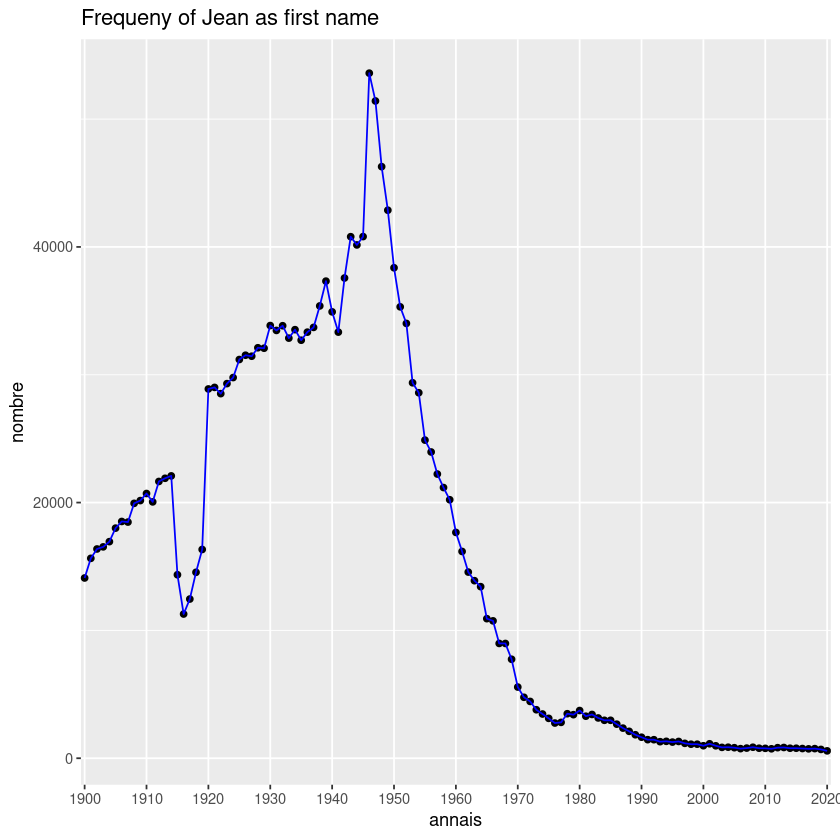

In [70]:
jean_freq <- get_name_freq(FirstNames, 'JEAN')
scale <- scale_x_discrete(breaks = round(seq(min(jean_freq$annais), max(jean_freq$annais), by = 10),1))
ggplot(data=jean_freq, aes(x=annais, y=nombre, group = 1)) + ggtitle("Frequeny of Jean as first name") + geom_point() + geom_line(color="blue") + scale

The graph shows that while the name Jean enjoyed popularity from the 1900's until a peak in 1945, it has continues to drop in popularity consistently since them. 

## Frequency of the first name ARNAUD over time

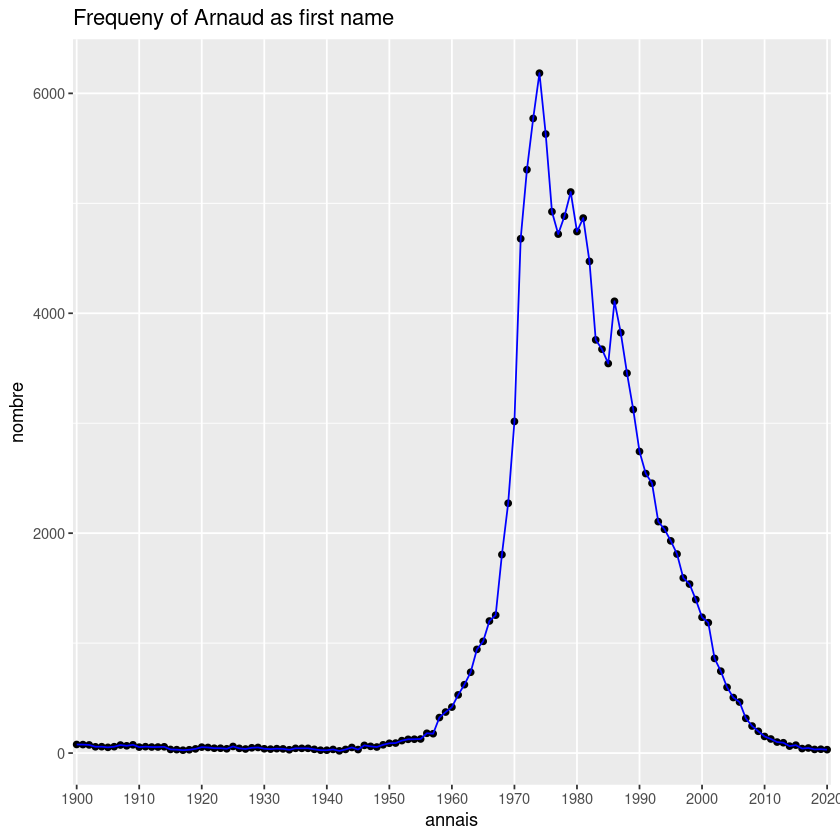

In [43]:
freq_by_year<- filter(.data = FirstNames, preusuel == 'ARNAUD') %>% group_by(annais) %>% summarise(nombre = sum(nombre))
ggplot(freq_by_year, mapping = aes(x=annais, y=nombre, group = 1)) + ggtitle("Frequeny of Arnaud as first name")+  geom_point() + geom_line(color="blue") + scale

Again the name 'Arnaud' enjoyed popularity from 1960 until a peak in 1975 when it started to decline.

## Most common male names over the years

`summarise()` has grouped output by 'annais'. You can override using the `.groups` argument.



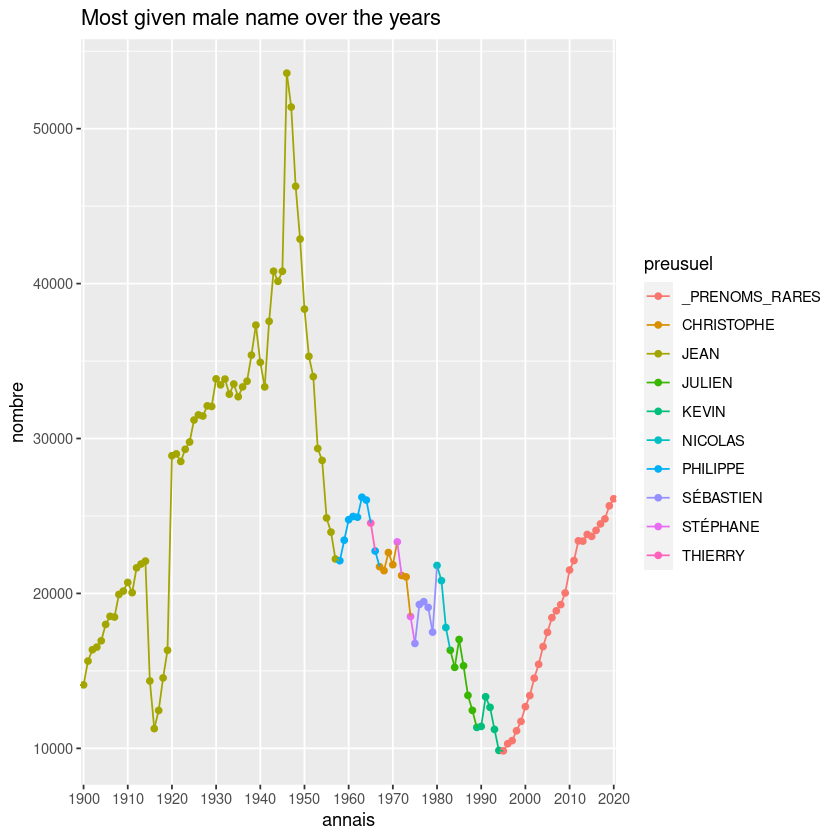

In [66]:
x <- FirstNames %>% filter(sexe == 1) %>% group_by(annais, preusuel) %>% summarise(nombre = sum(nombre)) %>% top_n(1, nombre) 
ggplot(data=x, aes(x=annais, y=nombre, colour=preusuel, group = 1)) +
  geom_point() + geom_line() + scale + ggtitle("Most given male name over the years") 

## Most common Female names over the years

`summarise()` has grouped output by 'annais'. You can override using the `.groups` argument.



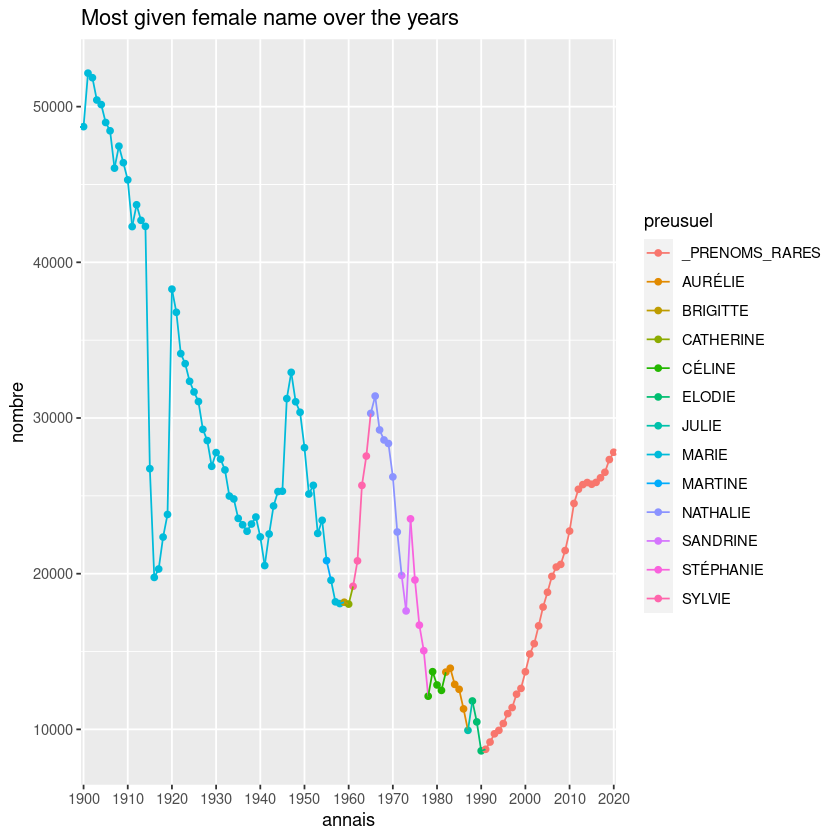

In [68]:
y <- FirstNames %>% filter(sexe == 2) %>% group_by(annais, preusuel) %>% summarise(nombre = sum(nombre)) %>% top_n(1, nombre) 
ggplot(data=y, aes(x=annais, y=nombre, colour=preusuel, group = 1)) +
  geom_point() + geom_line() + scale + ggtitle("Most given female name over the years") 

## Synthesis

A common trend in the data is that a lot of names that used too be common the past have lost popularity with new names emerging with more popularity. However, there is a clear trend where rare firstnames are now more common, showing that no single name dominates. 